In [1]:
import os

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
print(os.getcwd())

C:\Users\Welcome


In [7]:
os.chdir("D:\edwisor data\PROJECT")

In [8]:
df=pd.read_csv("D:\edwisor data\PROJECT\Bank-loan.csv",na_values=('&','$','#'))

In [9]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [10]:
df.shape

(850, 9)

In [11]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [12]:
df.columns=['Age','Education','Employement','Address','Income','debt income','credit debt','other debt','default']

In [13]:
df.head()

,Age,Education,Employement,Address,Income,debt income,credit debt,other debt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [14]:
df=df.dropna(how='any')

In [15]:
df.isna().sum()

Age            0
Education      0
Employement    0
Address        0
Income         0
debt income    0
credit debt    0
other debt     0
default        0
dtype: int64

In [16]:
 
df.shape


(700, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
Age            700 non-null int64
Education      700 non-null int64
Employement    700 non-null int64
Address        700 non-null int64
Income         700 non-null int64
debt income    700 non-null float64
credit debt    700 non-null float64
other debt     700 non-null float64
default        700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [18]:
df.describe()

,Age,Education,Employement,Address,Income,debt income,credit debt,other debt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


C:\Users\Welcome\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Welcome\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


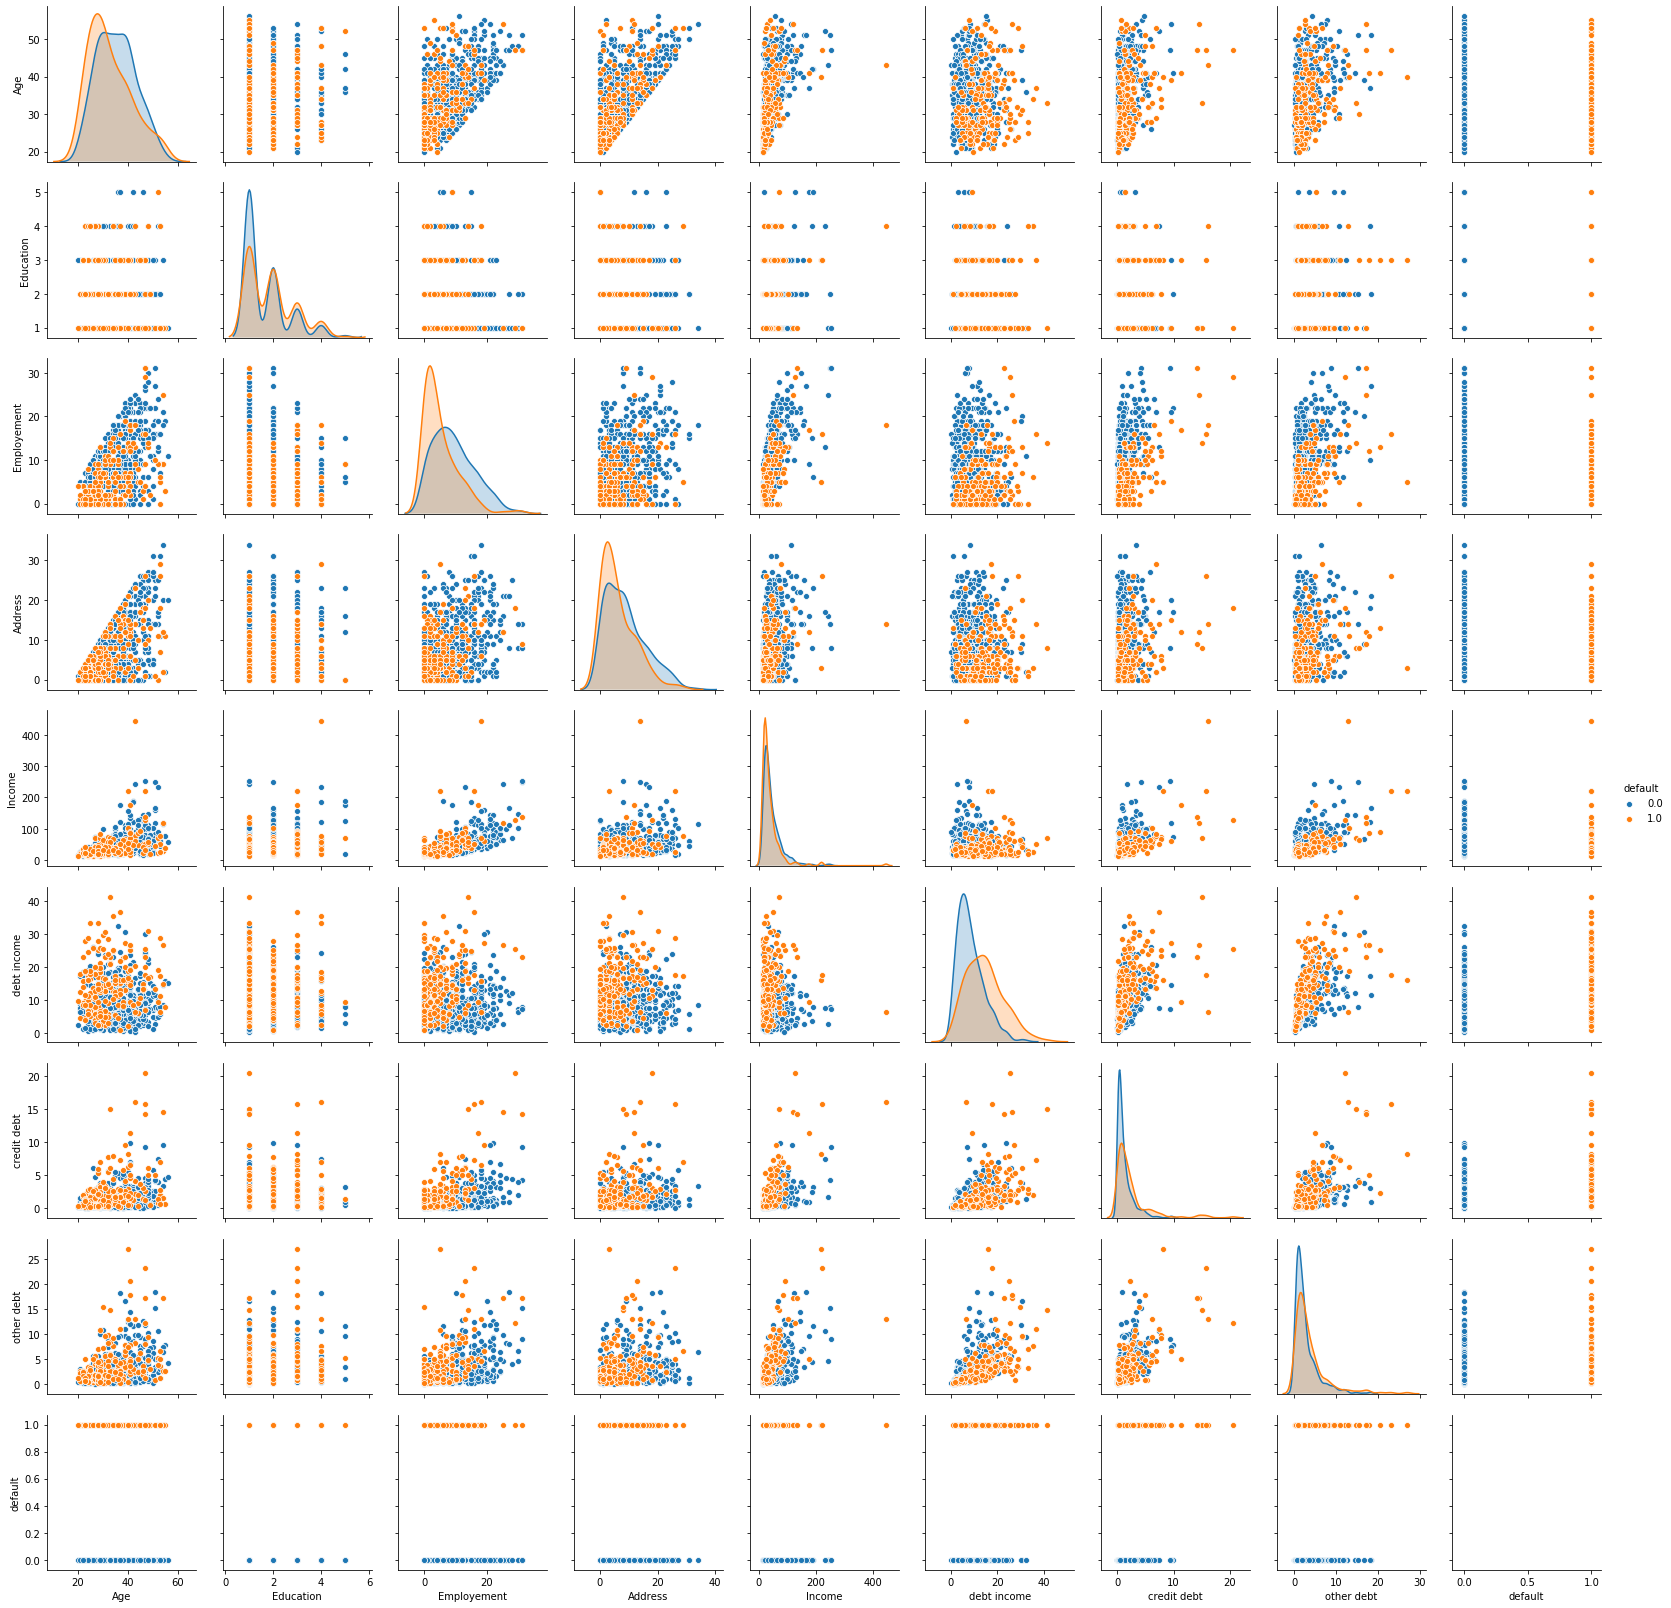

In [19]:
sns.pairplot(df,hue='default')

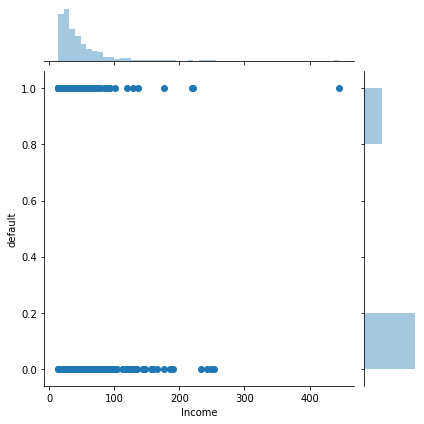

In [20]:
sns.jointplot('Income','default',data=df)

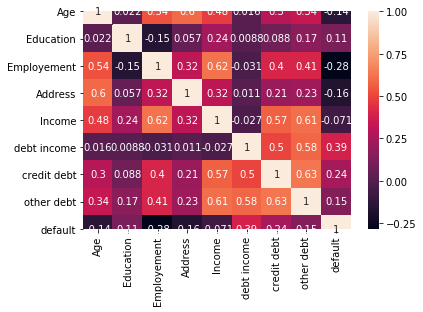

In [37]:
sns.heatmap(df.corr(),annot=True)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=df.drop('default',axis=1)

In [23]:
y=df['default']

In [24]:
X.shape,y.shape

((700, 8), (700,))

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr=LogisticRegression()

In [28]:
lr.fit(X_train,y_train)

C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred=lr.predict(X_test)

In [30]:
print('The Accuracy  on the training dataset is: ', lr.score(X_train, y_train) )

The Accuracy  on the training dataset is:  0.8244897959183674


In [31]:
score=lr.score(X_test,y_test)
score

0.7857142857142857

In [32]:
from sklearn import metrics

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[143,   9],
       [ 36,  22]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       152
         1.0       0.71      0.38      0.49        58

    accuracy                           0.79       210
   macro avg       0.75      0.66      0.68       210
weighted avg       0.77      0.79      0.76       210



In [ ]:
##DECISION TREE CLASSIFIER

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtree=DecisionTreeClassifier()

In [41]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
y_pred=dtree.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       152
         1.0       0.45      0.40      0.42        58

    accuracy                           0.70       210
   macro avg       0.62      0.61      0.61       210
weighted avg       0.69      0.70      0.69       210



In [50]:
print(confusion_matrix(y_test,y_pred))

[[124  28]
 [ 35  23]]


In [ ]:
### RANDOM FOREST CLASSIFIER

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
classifier_rf=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100, oob_score=True)

In [54]:
%%time
classifier_rf.fit(X_train,y_train)


Wall time: 745 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [72]:
y_pred1=classifier_rf.predict(X_test)

In [55]:
classifier_rf.oob_score_

0.7755102040816326

In [56]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)

In [57]:
params={
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200]
}

In [58]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')

In [61]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.0min finished


Wall time: 2min 58s


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_

In [62]:
grid_search.best_score_

0.810204081632653

In [63]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

[Text(3073.359375, 4983.0, 'other debt <= 2.349\nentropy = 0.388\nsamples = 308\nvalue = [361, 129]\nclass = default'),
 Text(1874.53125, 4077.0, 'Age <= 29.5\nentropy = 0.286\nsamples = 168\nvalue = [230, 48]\nclass = default'),
 Text(1133.4375, 3171.0, 'debt income <= 11.8\nentropy = 0.424\nsamples = 76\nvalue = [89, 39]\nclass = default'),
 Text(697.5, 2265.0, 'Income <= 20.5\nentropy = 0.322\nsamples = 62\nvalue = [83, 21]\nclass = default'),
 Text(348.75, 1359.0, 'debt income <= 4.45\nentropy = 0.496\nsamples = 21\nvalue = [18, 15]\nclass = default'),
 Text(174.375, 453.0, 'entropy = 0.142\nsamples = 10\nvalue = [12, 1]\nclass = default'),
 Text(523.125, 453.0, 'entropy = 0.42\nsamples = 11\nvalue = [6, 14]\nclass = not default'),
 Text(1046.25, 1359.0, 'Income <= 23.5\nentropy = 0.155\nsamples = 41\nvalue = [65, 6]\nclass = default'),
 Text(871.875, 453.0, 'entropy = 0.252\nsamples = 16\nvalue = [23, 4]\nclass = default'),
 Text(1220.625, 453.0, 'entropy = 0.087\nsamples = 25\nva

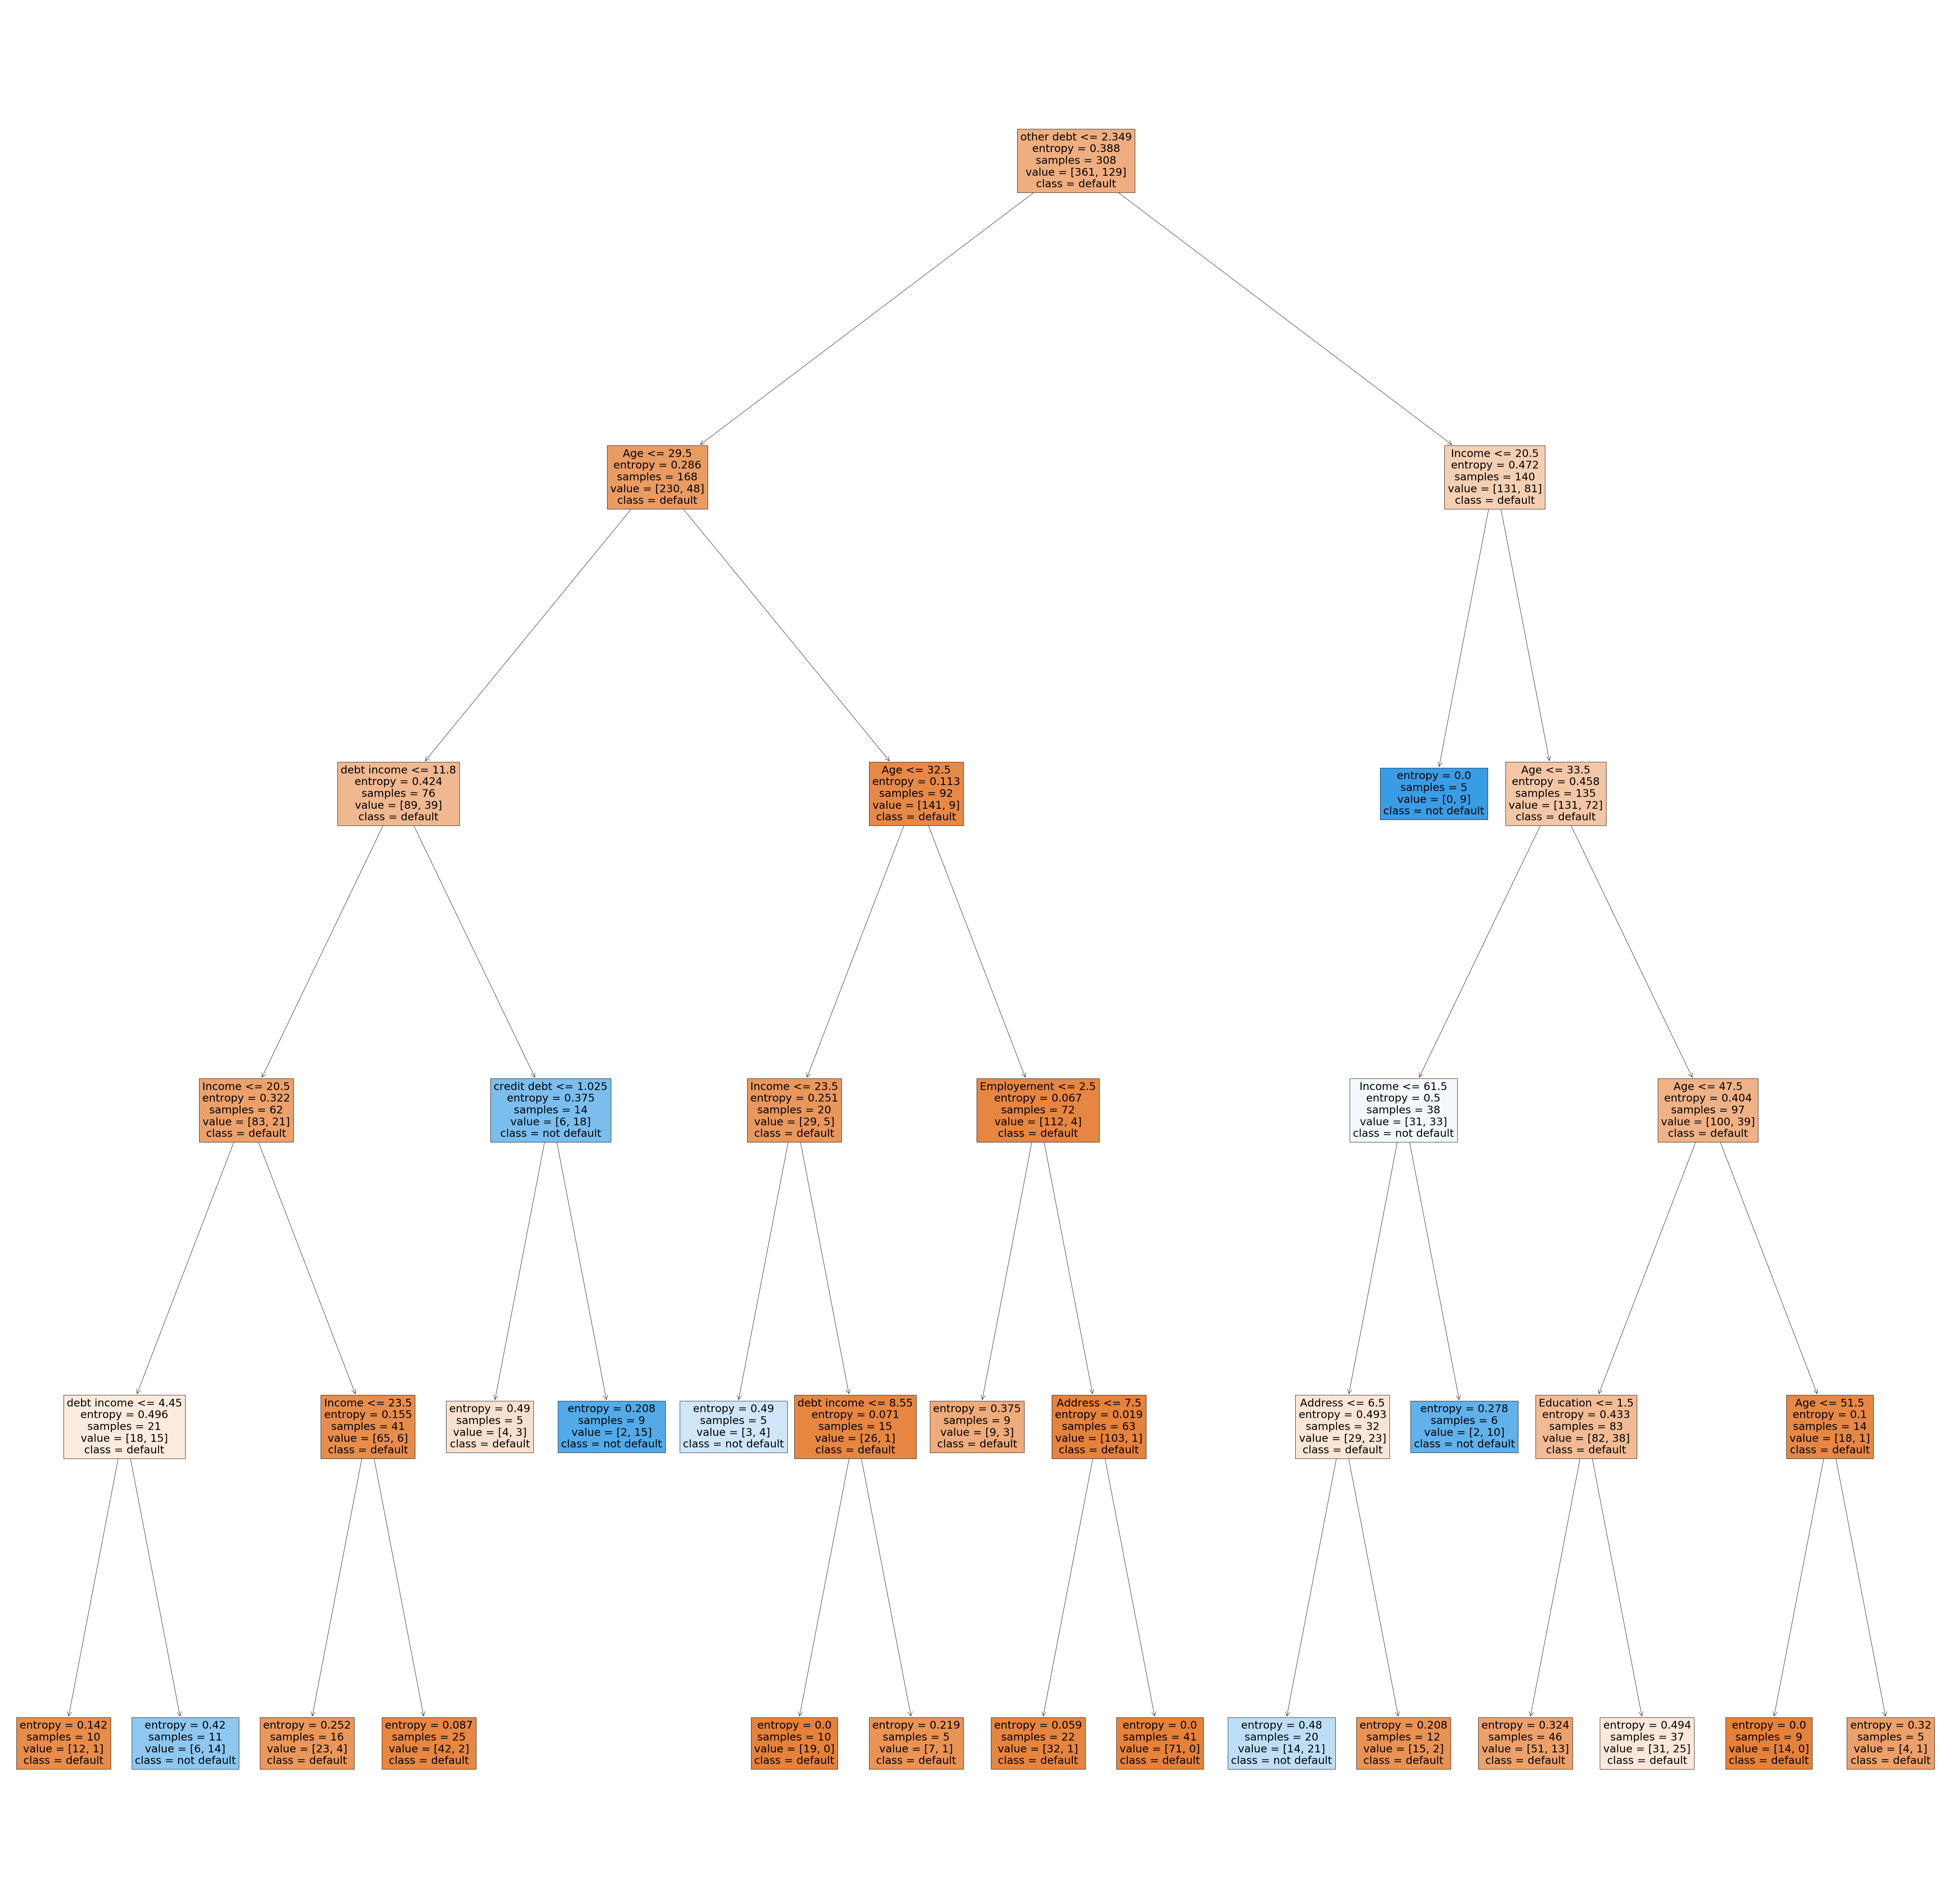

In [69]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100,100))
plot_tree(rf_best.estimators_[5],feature_names=X.columns,class_names=['default',"not default"],filled=True)

In [67]:
rf_best.feature_importances_

array([0.08071626, 0.02266314, 0.19707985, 0.0791947 , 0.08551911,
       0.27022138, 0.16856408, 0.09604148])

In [73]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86       152
         1.0       0.74      0.29      0.42        58

    accuracy                           0.78       210
   macro avg       0.76      0.63      0.64       210
weighted avg       0.77      0.78      0.74       210



In [ ]:
##MAXIMUM ACCURACY ACHEIVED IN LOGISTIC REGRESSION IE 79 %.